<a href="https://colab.research.google.com/github/Meyssemmedini/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#First Choice: Banking Dataset Classification

##Source of Data:

The data comes from direct marketing campaigns of a Portuguese banking institution. [kaggle link](https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification)

##Brief Description of Data:

The dataset we are using (train.csv) has 32,950 examples and 16 inputs (features).  The target feature is whether the client will subscribe to a term deposit ('yes' or 'no'). The marketing campaigns were based on phone calls, and multiple contacts with the same client were made to determine if they would subscribe to the product.
##Target:

The target variable is 'y,' representing whether the client will subscribe to a term deposit ('yes' or 'no').
##What Does One Row Represent?

One row represents a client who was part of a marketing campaign, and the features capture various details about the client and the campaign.
Classification or Regression Problem:

This is a classification problem since the goal is to predict whether the client will subscribe to a term deposit or not.
##Number of Features:

There are 16 features in the dataset we are using .
##Number of Rows:

The dataset we are usinghas 32,950 rows
##Challenges:

Challenges in cleaning, exploring, or modeling this dataset might include handling categorical features, dealing with any missing or inconsistent data, and understanding the impact of features like 'duration' that highly affect the target variable.

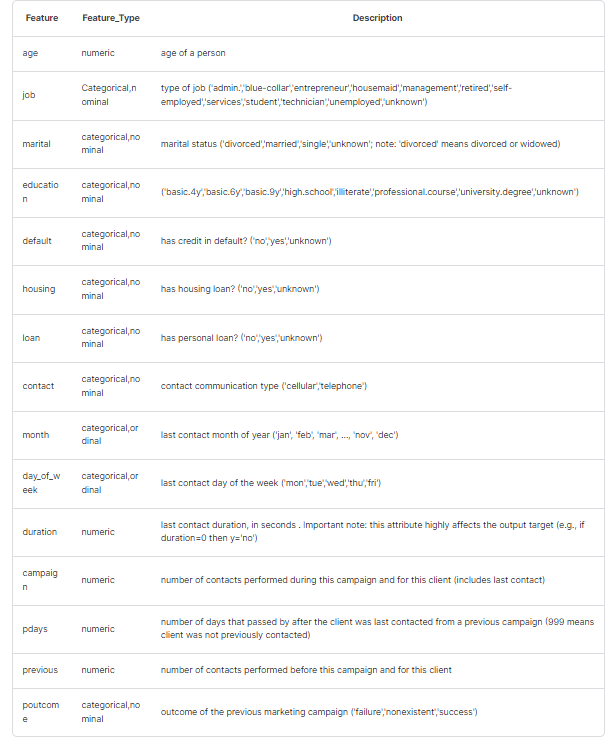

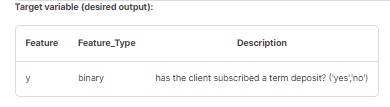

In [28]:
df= pd.read_csv('/content/drive/MyDrive/coding dojo/Machine Learning/week 7/new_train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [29]:
# Check for dubplicated data
df.duplicated().sum()

8

In [30]:
#drop duplicates
df.drop_duplicates(inplace= True)

In [31]:
# Check the df to see if there are missing values
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [32]:
##checking and dealing inconsistent data type if needed
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

data types seems correct according to the dictionary

In [33]:
#checking and dealing with inconsistencies in categorical values
object_cols = df.select_dtypes("object").columns
for column in object_cols:
  print(column, df[column].unique())

job ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
marital ['married' 'divorced' 'single' 'unknown']
education ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
default ['unknown' 'no' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['cellular' 'telephone']
month ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


In [34]:
#replacing months and days with full name
df ['month']= df['month'].replace ({'nov': 'November',
                                    'jul': 'July',
                                    'may' : 'May',
                                    'jun': 'June',
                                    'aug' : 'August',
                                    'mar': 'Mars',
                                    'oct' : 'October',
                                    'apr' : 'April',
                                    'sep' : 'September',
                                    'dec' : 'December'

})
df ['day_of_week']= df['day_of_week'].replace ({ 'wed':'Wednesday',
                                                'mon': 'Monday',
                                                 'tue': 'Tuesday',
                                                 'fri': 'Friday',
                                                 'thu': 'Thursday'})


In [35]:
df.rename(columns={'y': 'Client subscription'}, inplace=True)

In [36]:
#Cheking and dealing with inappropriate or unusual data points if needed
num_cols = df.select_dtypes("number").columns
df[num_cols].describe()

,age,duration,campaign,pdays,previous
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,258.159614,2.560804,962.043440,0.174762
std,10.403035,258.995259,2.752579,187.973035,0.499078
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [37]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,Client subscription
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,November,Wednesday,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,November,Wednesday,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,July,Monday,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,May,Monday,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,June,Tuesday,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,July,Tuesday,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,November,Friday,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,July,Monday,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,May,Friday,165,1,999,0,nonexistent,no


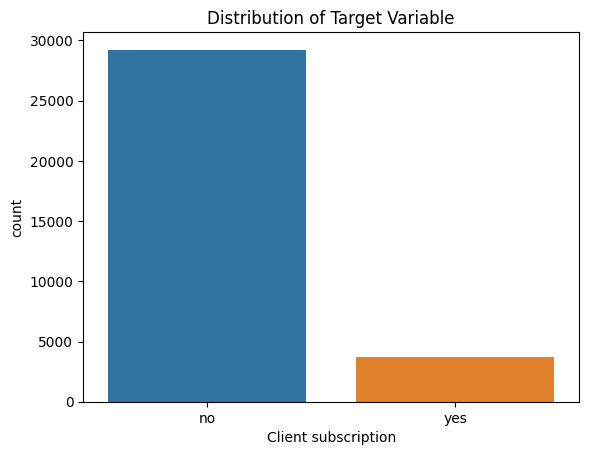

In [38]:
#bar plot to visualize the distribution of 'yes' and 'no' values of the target variable.
sns.countplot(x='Client subscription', data=df)
plt.title('Distribution of Target Variable')
plt.show()


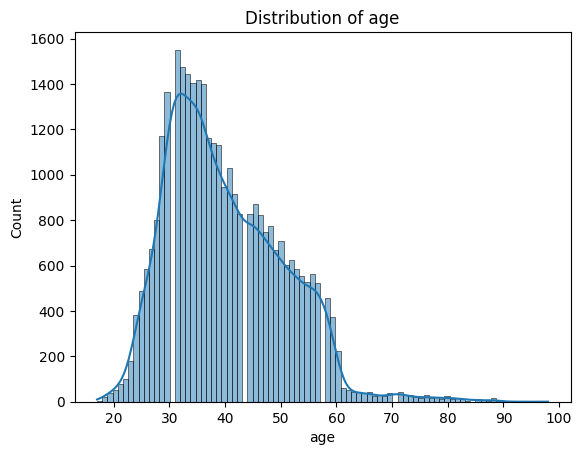

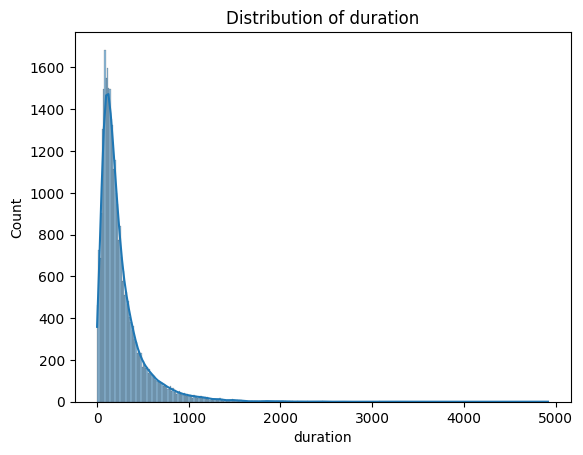

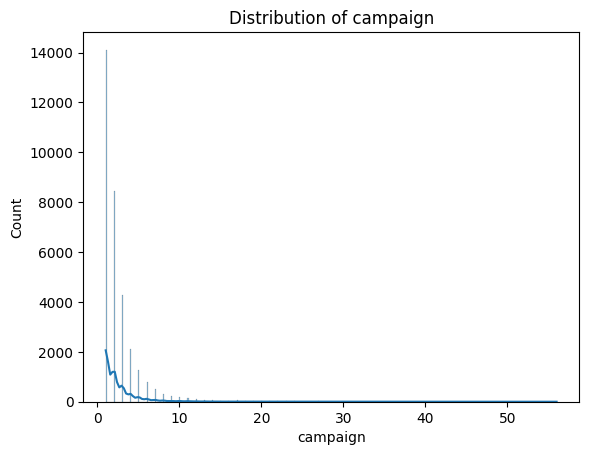

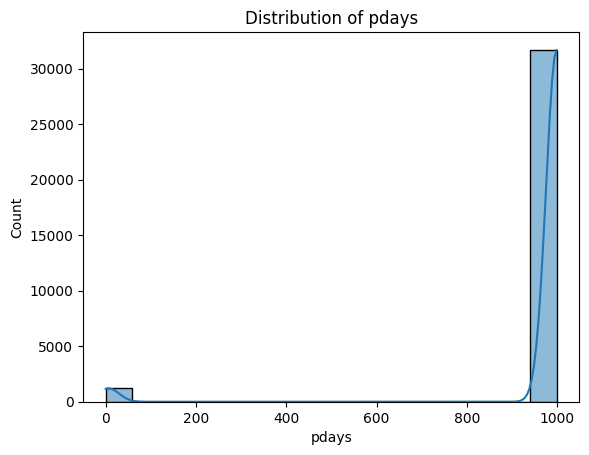

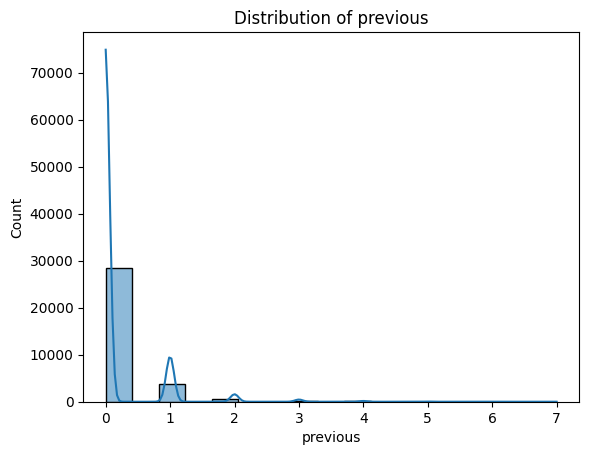

In [41]:
numeric_features = ['age', 'duration', 'campaign', 'pdays', 'previous']

for feature in numeric_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

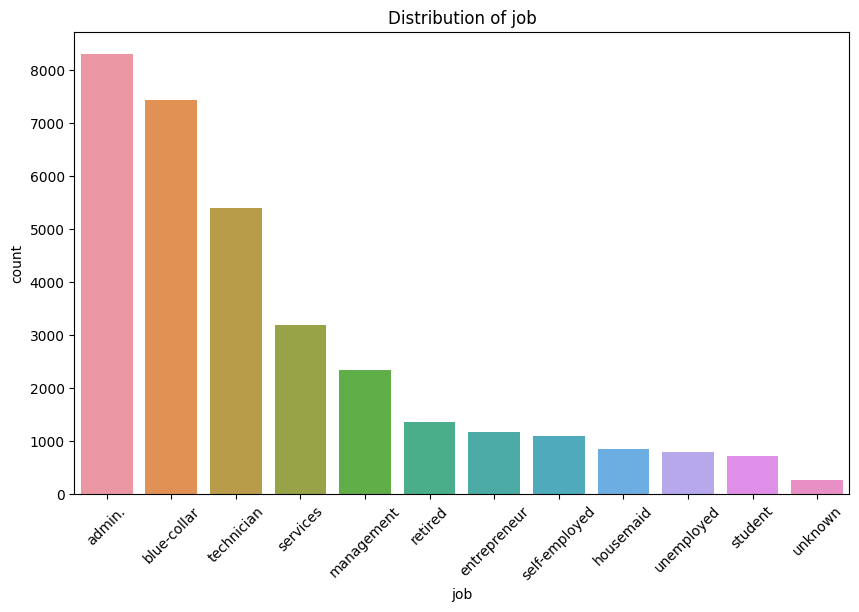

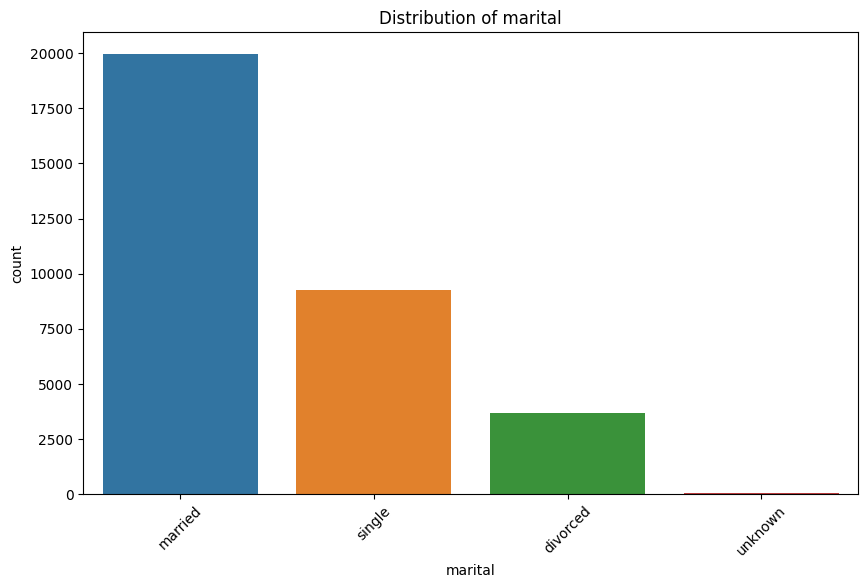

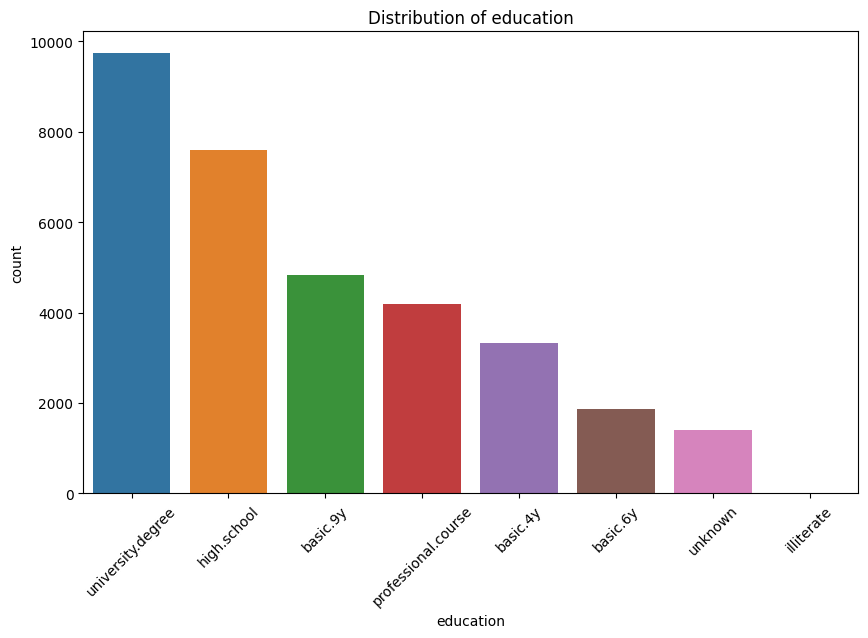

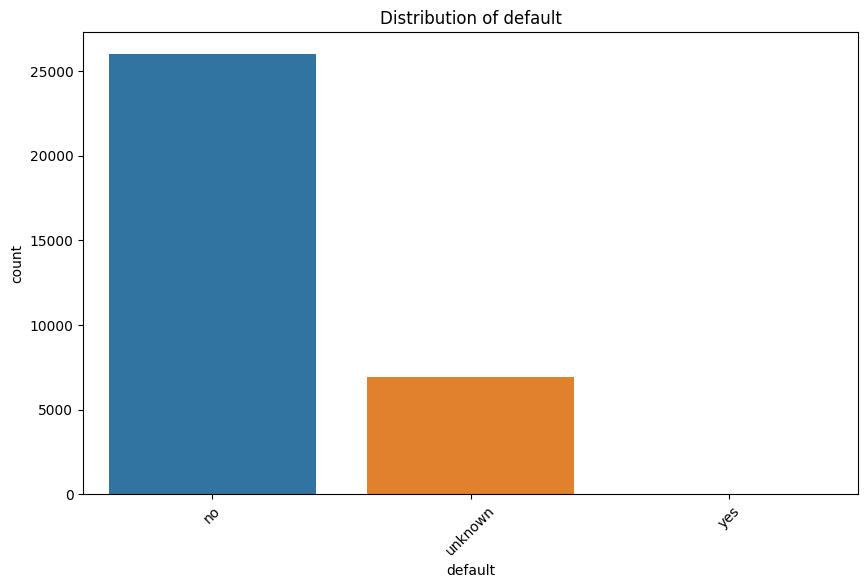

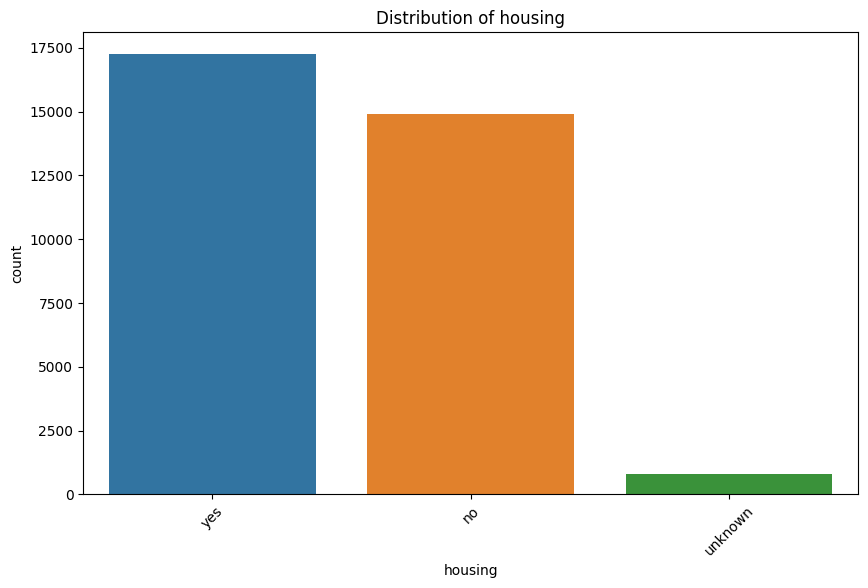

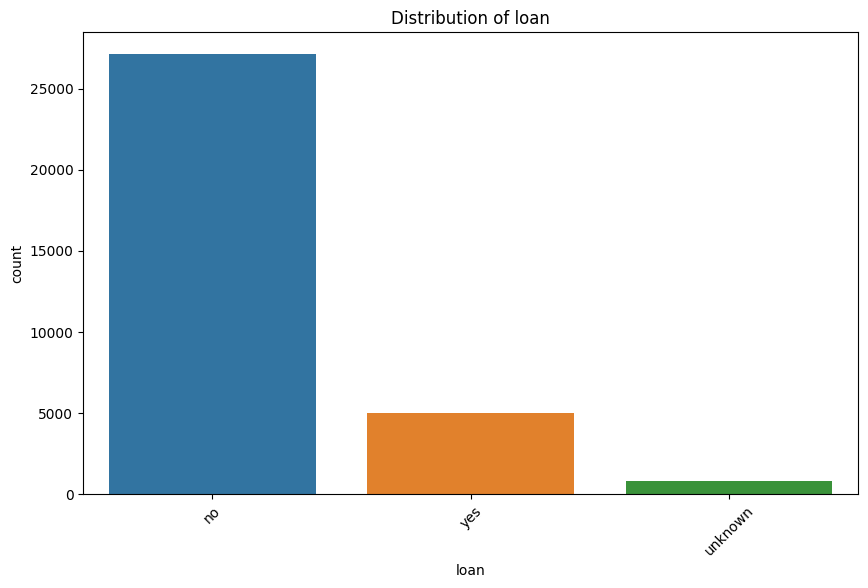

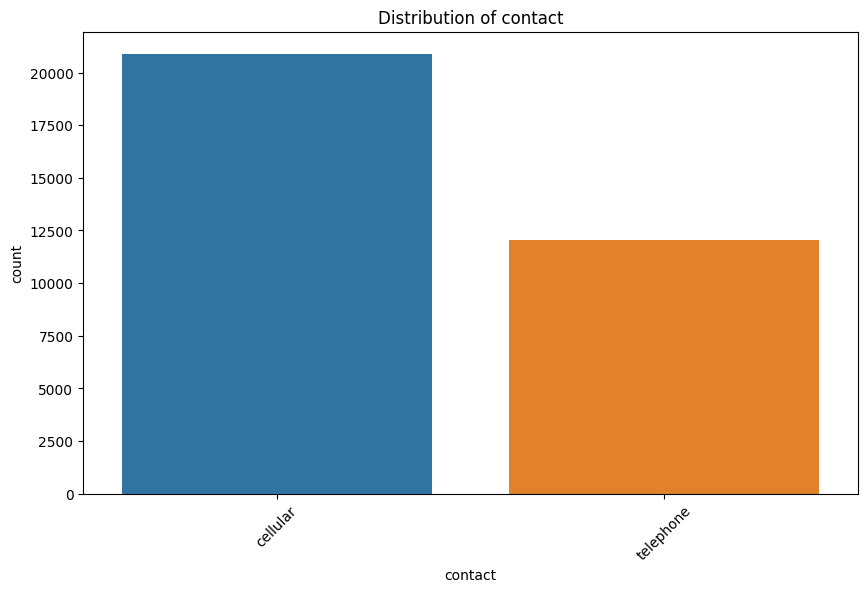

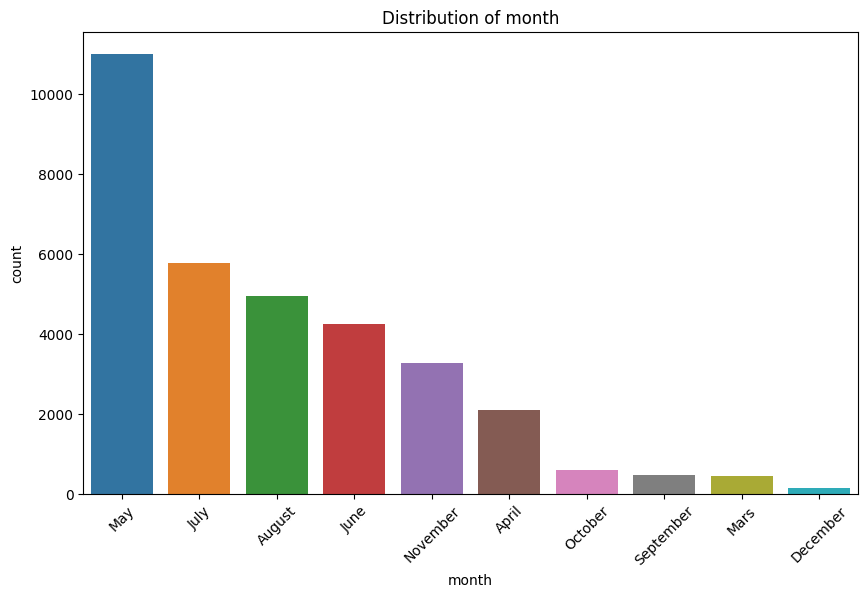

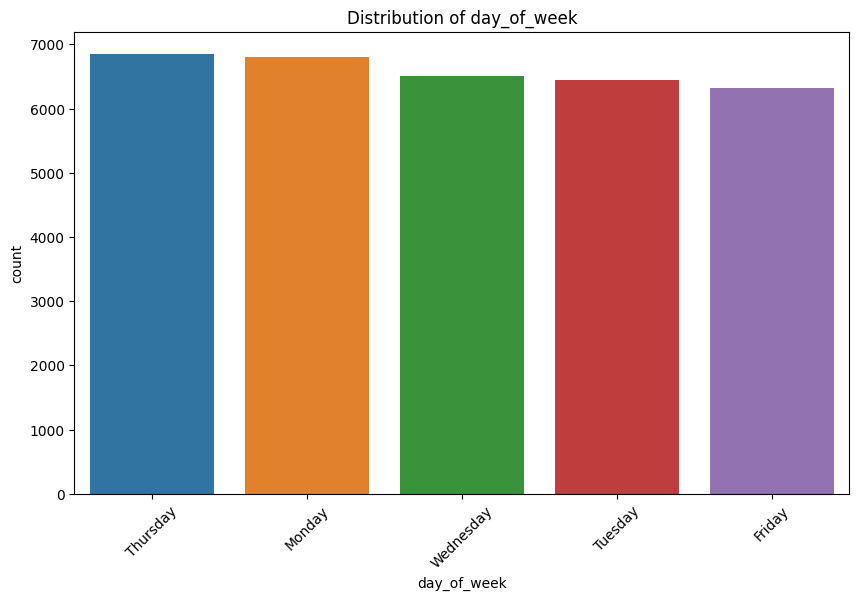

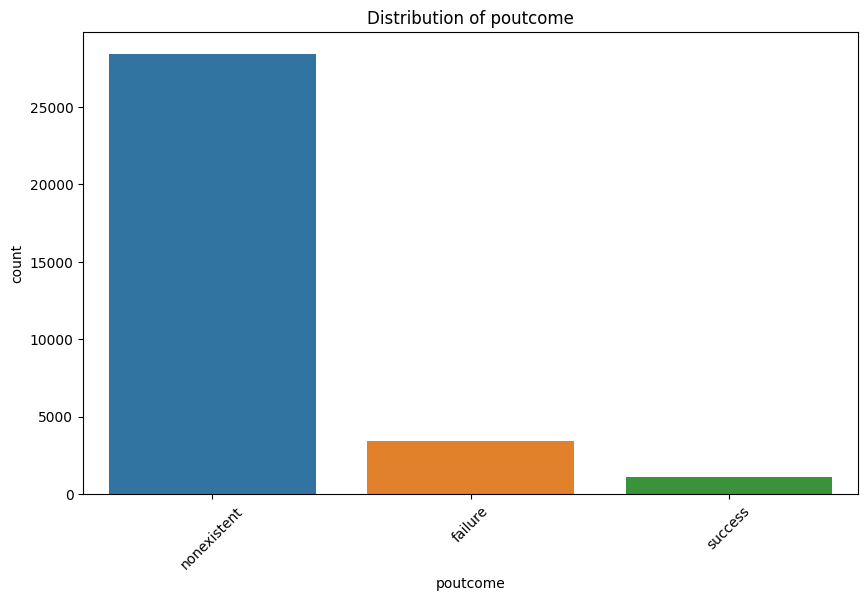

In [42]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


#Second Choice: Crunchbase Investments Dataset
##Source of Data

The dataset seems to be sourced from Crunchbase, a platform for discovering innovative companies and startups.[kaggle link](https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase/data)
##Brief Description of Data:

The dataset contains information about investments in companies. has 54293 examples and 39 inputs (features). The challenge is to predict the company status (operating/closed/acquired) based on investment-related criteria and other features.
##Target:

The target variable is the status column, which indicates whether the company is operating, closed, or acquired.
##What Does One Row Represent?

One row represents information about a company, including its name, category, market, funding details, and status and other informations.
##Classification or Regression Problem:

This is a classification problem since the goal is to predict the categorical variable 'status' with multiple classes.
##Number of Features:

The dataset has 39 features
##Number of Rows:
The dataset has 54293 rows
##Challenges:

Challenges in cleaning, exploring, or modeling this dataset might include handling missing values, dealing with categorical variables, understanding the impact of funding details on the company status, and preprocessing text data in columns like category_list and market.

In [39]:
df2= pd.read_csv("/content/drive/MyDrive/coding dojo/Machine Learning/week 7/investments_VC.csv", encoding= 'latin-1')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
